# SIMPLE LINEAR REGRESSION

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.datasets import fetch_california_housing

In [14]:
df = fetch_california_housing()

In [16]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [17]:
dataset=pd.DataFrame(df.data)

In [18]:
dataset.columns = df.feature_names

In [19]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## independent feature and dependent feature

In [22]:
x = dataset
y = df.target

## train_test_split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.33 , random_state=1)

In [25]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7529,2.5893,33.0,3.890805,1.045977,984.0,5.655172,33.91,-118.23
13750,6.7460,5.0,7.080645,0.965054,1173.0,3.153226,34.05,-117.14
12,3.0750,52.0,5.322650,1.012821,1098.0,2.346154,37.85,-122.26
6985,4.8152,36.0,5.637324,1.021127,715.0,2.517606,33.97,-118.03
10796,9.2175,35.0,6.268734,0.927649,937.0,2.421189,33.62,-117.91
...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


## Standardizing  the dataset

In [26]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [31]:
from sklearn.linear_model import LinearRegression

## CROSS VALIDATON

from sklearn.model_selection import cross_val_score

regression = LinearRegression()
regression.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [35]:
# mean_squared_error

mse = cross_val_score(regression,x_train,y_train,scoring = 'neg_mean_squared_error' , cv=5)
mse

array([-0.51986768, -0.53728972, -0.50154429, -0.51322592, -0.58009176])

In [36]:
np.mean(mse)

-0.5304038747979221

# prediction

In [38]:
reg_pred = regression.predict(x_test)
reg_pred

array([2.17864714, 0.96824054, 2.69503605, ..., 2.21934424, 1.54008581,
       1.22562675])

# seen by visualization

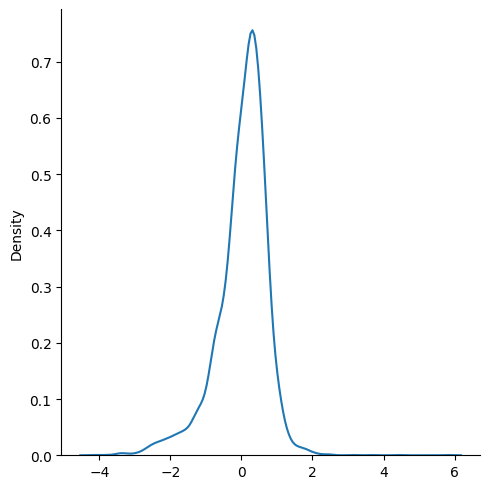

In [39]:
sns.displot(reg_pred - y_test, kind = 'kde')

# getting predicton score

In [42]:
from sklearn.metrics import r2_score

score = r2_score(reg_pred,y_test)
score

0.3521500350771337